# Lab06 Tutorial
## Learning outcomes
We will be doing Bayesian inference for discrete and continous variables. <br>
We will also use a new package called scipy stats:
https://docs.scipy.org/doc/scipy/reference/stats.html
## Preliminaries
Sets up the environment by importing pandas, numpy, matplotlib, and seaborn. Because we are using plots make sure that you configure your notebook such that plots are shown inline (see Assignment 2). Preliminaries are already taken care off in the workbook. 

In [13]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
import pandas as pd
import numpy as np
import seaborn as sns

# Bayesian Inference for Discrete variable
One of the side effects of diabetes medication is weight gain. 10% of people using these drugs gain weight. A drug company is claiming that it has a drug that reduces the rate of weight gain to 5% of people that take the drug. suppose that the side effect after the drug use has been observed in 8 out of 100 people! Calculate the p-value and power.

H0: The drug does not impact the rate of side effect(i.e. p=0.1)

H1: The drug halves the complication rate (i.e. p=0.05)

The probability of success (side effect) changes under the H0 and H1

## Monte Carlo Simulation 
* Having the side effect can be like the outcome of a coin toss. You either have the side effect (heads) or you don't (tails).
* It is also a discrete variable (0 and 1)

In [14]:
np.array(range(0, 12),dtype = 'float64')

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [15]:
def monteCarloSim(p,N,numIter):
    # does the montecarlo simulation
    # Inputs:
    # p : probability of success
    # N : number of coin tosses
    # numIter: number of iteration
    # Outputs:
    # numHeads: distribution for the number of heads

    numHeads = np.array(range(numIter),dtype = 'float64')

    for i in range(numIter):
        options = [0,1] # possible outcomes
        probDist = [1-p,p] # the probability associated for each possible outcome

        # Solution 1: use random choice and sum over hits
        a=np.random.choice(options,N,p=probDist)  #随机抽取 N 次，得到 N 个 0 或 1 组成的数组 a。
        #a.sum() 计算 1 的个数，也就是正面朝上的次数，存入 numHeads[i]
        numHeads[i]=a.sum() ## distribution for the number of heads  
        # Solution 2: Use random binomial 
        # numHeads[i]=np.random.binomial(N,p) 
    return numHeads

## Distribution under the null hypothesis
H0: Drug does not impact the rate of side effects.

* probability of gaining weight in general is 0.1.
* "_8 out of __100__ people have the side effect_". Number of coin tosses = 100
* Let's set the number of iterations to 1000

<class 'numpy.ndarray'>
(1000,)


Text(0, 0.5, 'Frequency')

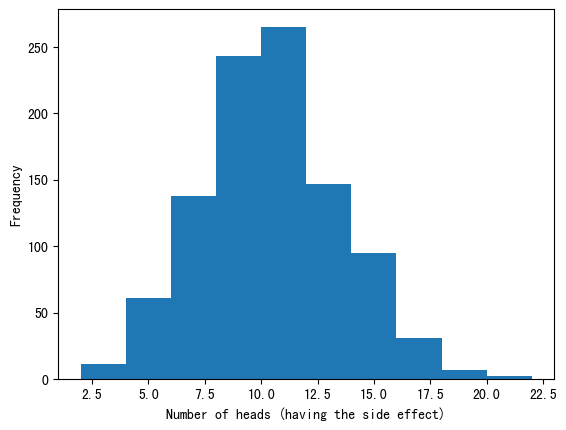

In [16]:
# distribution under the null hypothesis:
# what are the inputs to monteCarloSim?
## p probability of detecting the intruder: 0.1
## N number of coin tosses (number of people that have been examined): 100
## numIter number of times you want to do the simulation: 1000
numHeads0 = monteCarloSim(0.1, 100, 1000)

# practice debugging: One of the problems that you will run into is the "Shape" problem
# indexOutOfRange OR ValueError: not enough values to unpack (expected 2, got 1)
## print the type 
print(type(numHeads0))
## print the shape
# [r, c] = numHeads0.shape
print(numHeads0.shape)
#print(numHeads0.reshape((-1, 1)).shape)

# plot the distribution
plt.hist(numHeads0)
plt.xlabel('Number of heads (having the side effect)')
plt.ylabel('Frequency')

## Distribution under the Alternative hypothesis
H1: Drug halves the rate of side effect.

In this case, the probability of having the side effect will be 0.05.

* probability of gaining weight if using drug is 0.05.
* "_8 out of __100__ people have the side effect_". Number of coin tosses = 100
* Let's set the number of iterations to 1000

In [12]:
monteCarloSim(0.05, 100, 1000).reshape((-1, 1)).shape

(1000, 1)

<class 'numpy.ndarray'>
(1000,)
(1000, 1)


Text(0, 0.5, 'Frequency')

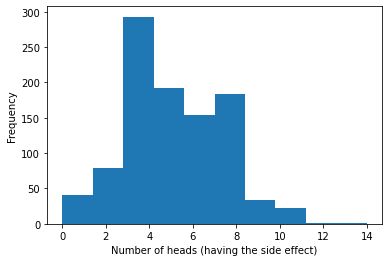

In [4]:
# distribution under the alternative hypothesis (that the new surveillance system doubles the intruder detection rate)
# what are the inputs to monteCarloSim?
## p probability of detecting the intruder: 0.6
## N number of coin tosses (number of people that have entered the building): 1000
## numIter number of times you want to do the simulation
numHeads1 = monteCarloSim(0.05, 100, 1000)

# practice debugging: One of the problems that you will run into is the "Shape" problem
# indexOutOfRange OR ValueError: not enough values to unpack (expected 2, got 1)
## print the type
print(type(numHeads1))
## print the shape
# [r, c] = numHeads1.shape
print(numHeads1.shape)
print(numHeads1.reshape((-1, 1)).shape) ## to transfer the result to a 2-dimensional array 
## for what?: easy to plot. since when ploting with (x,y), X 通常需要是二维的 (1000, 1)

# plot the distribution
plt.hist(numHeads1)
plt.xlabel('Number of heads (having the side effect)')
plt.ylabel('Frequency')

## Plot both distribution on top of each other with a vertical line showing the observed number of people that have the side effect:

Text(0, 0.5, 'Frequency')

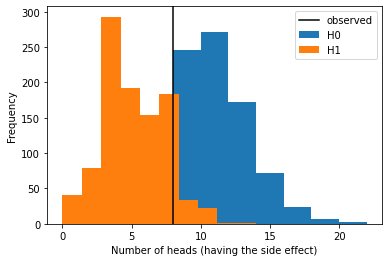

In [5]:
# plot the distributions in a single figure
plt.hist(numHeads0)
plt.hist(numHeads1)
plt.axvline(x = 8, color = 'k')
plt.legend(('observed', 'H0', 'H1'))
plt.xlabel('Number of heads (having the side effect)')
plt.ylabel('Frequency')

## Calculate p-value and power <font color = 'red'>(Slide 3)


In [6]:
# how to calculate p-value and power?
## calculate p-value
### p-value is the probability of rejecting the null hypothesis given that it's true!
#### which distribution must be used to get the p-value?
pVal = sum(numHeads0<=8)/1000
## calculate power
### power is rejecting the H0 given that H1 is true
#### which distribution must be used?
power = sum(numHeads1<=8)/1000

print(pVal)
print(power)

0.317
0.942


In [7]:
# Calculate the Bayes factor
# BF10 = p(Data|H1)/p(Data|H0)
BF10 = (sum(numHeads1 == 8)/1000) / (sum(numHeads0 == 8)/1000)
BF10

0.5309734513274336

# Bayesian Inference for Continous variable
In the movieDataset, let's see whether the box office revenue of movies directed by female directors is higher than that of movies directed by male directors.

boxoff is the total box-office revnue of the movie in $10,000. 

H0: boxoff(female) <= boxoff(male)<br>
H1: boxoff(female) > boxoff(male) by $50,000. 

__Box office revenue is a continous variable__

Use a Bayesian hypothesis test to determine how strong the evidence is that the gender of the director being female  is associated with a significant reduction in box office revenue.You decide that it is appropriate to use a normal approximation for the average boxoff difference, both under the H1 and H0. Further, you assume the standard error of the mean difference is the same under the H1 and the H0 - although you still need to estimate the value. Build an approximation for the probability density for the real mean difference under H1 and H0. Then calculate and report the Bayes Factor of the H1 over the H0. What can you conclude from this result? 


## Important:
read about probability density function (pdf) and probability mass function (pmf): <br>
https://en.wikipedia.org/wiki/Probability_mass_function

https://en.wikipedia.org/wiki/Probability_density_function

In [18]:
df = pd.read_csv('movieDataset.csv')
df.head()

,Unnamed: 0,boxoff,prodcost,dirIncome,dirGender,year,month,genre,numTheatres
0,0,88.648583,44.742936,3.393535,male,2012,3,comedy,139.0
1,1,145.334924,38.835516,1.134711,female,2014,11,drama,213.0
2,2,238.265684,29.532283,2.418883,male,2015,6,other,100.0
3,3,212.714742,157.111899,2.034115,male,2014,10,adventure,436.0
4,4,120.175461,30.547155,0.963219,female,2012,1,comedy,115.0


## Calculate the difference between mean boxoffice revenue for movies directed by female and male directors

In [19]:
# group boxoff by dirGender and return the difference between the mean boxoff of the two groups
## There are multiple ways to do it.
## Uisng groupby is just one way of doing it.
def meanDif(D): 
    group = D['boxoff'].groupby(D['dirGender']).mean()
    ## print(group)
    difference = group[0] - group[1]
    return difference

diff = meanDif(df)
diff
# Negative numbers mean that box-office in higher for movies directed by male directors

-7.297305964184233

## Randomization test 
Our permutation function here will also return the distribution of the test statistic!
We need this to estimate the standard error of the mean difference under the null hypothesis.

In [20]:
# modify the permutation function so that it returns p value and the distribution of the test stat
def performRandomization(D,fcn,shuffle,numIterations=500,sides=1, nbins = 10):
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data
        S=D.copy()                    # Make copy of the data frame
        x = np.array(range(len(D.index))) # Make copy of the data frame
        np.random.shuffle(x)          # randomly shuffle x - note that this changes x itself!
        y = S[shuffle].iloc[x]   # copy the newly reorded values into a new Series
        y = y.reset_index(drop=True)   #reoder the indices
        S[shuffle]=y           # Copy back into the data frame

        #2. Calculate test statistics
        listOfTS[i] = fcn(S)

    # 3. Caluclate the real test statistic
    realTS = fcn(D)

    # 4. Plot a histogram of the
    sns.histplot(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')

    # 5. determine p-value (one sided)
    if sides==1:
        p=sum(listOfTS>=realTS)/len(listOfTS)
        print(' P-value of the randomisation test is p= ',p)
    if sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=realTS)/len(listOfTS)
        print(' P-value of the randomisation test is p= ',p)
    return [p, listOfTS]

 P-value of the randomisation test is p=  0.676


Text(0, 0.5, 'frequency')

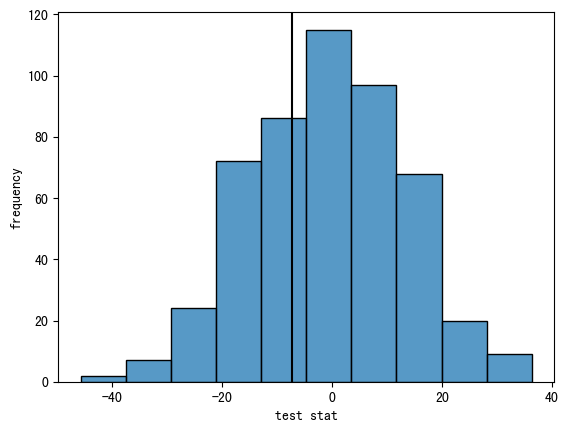

In [23]:
# Call the permutation function with dirGender as the exchangeable variable
[p, TS ]= performRandomization(df,meanDif,'dirGender',numIterations=500,sides=1, nbins = 10)
plt.xlabel('test stat')
plt.ylabel('frequency')

## Calculate the Bayes factor BF10
use std of the test stat to get values an estimate of the standard error of the mean difference 

In [25]:
SD = np.std(TS)
SD 

13.641450469584708

Now we look the value for the difference we get To read from the normal distribution:<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [26]:
# ss.norm.pdf(x, mean, std_dev)

p0 = ss.norm.pdf(diff, 0, SD)

"""diff：difference of mean。
0：H0 mean, set hypothesis as mean diff = 0。
SD：standatd deviation。
p0 : probability density """

print(p0) 
p1 = ss.norm.pdf(diff, 5.0, SD)  ##H1: boxoff(female) > boxoff(male) by $50,000.
print(p1) 

BF = p1/p0
print(f'Evidence in favor of the Alternative hypothesis: {BF:.3f}')
print(f'Evidence in favor of the Null hypothesis: {1/BF:.3f}')

# So overall inconclusive evidence in either direction.

0.02534611285672355
0.019479899543254738
Evidence in favor of the Alternative hypothesis: 0.769
Evidence in favor of the Null hypothesis: 1.301


pr

## Calculating posterior <font color = 'red'>(slides 5, 8, 9)
We will be using Bayes formula:
P(H|E) = (P(H) * P(E|H))/ P(E)

In [29]:
prior1 = 0.3
prior0 = 0.7
posterior1 = (prior1*p1)/(prior1*p1 + prior0*p0)
